In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [98]:
class Model(nn.Module):
    def __init__(self, in_feat=4, h1=10, h2=10, out_feat=3):
        super().__init__()
        self.fc1 = nn.Linear(in_feat, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feat)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x


In [99]:
torch.manual_seed(41)

model = Model()


In [100]:
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np

In [101]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [102]:
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)
df


/var/folders/8y/qyq16t6549scb0wwphs6rhjm0000gn/T/ipykernel_20590/683183120.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [103]:
X = df.drop('variety', axis=1)

X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [104]:
y = df['variety']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [105]:
X = X.values
y = y.values


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [108]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)


In [109]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [110]:
epochs = 200

losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())


    if i % 10 == 0:
        print(f'Epoch: {i}, loss: {loss}')

    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, loss: 1.1541285514831543
Epoch: 10, loss: 0.9390954971313477
Epoch: 20, loss: 0.683514416217804
Epoch: 30, loss: 0.40488201379776
Epoch: 40, loss: 0.2331339418888092
Epoch: 50, loss: 0.13173428177833557
Epoch: 60, loss: 0.07880021631717682
Epoch: 70, loss: 0.05487608164548874
Epoch: 80, loss: 0.04343618080019951
Epoch: 90, loss: 0.03708135336637497
Epoch: 100, loss: 0.03302427753806114
Epoch: 110, loss: 0.030146105214953423
Epoch: 120, loss: 0.02794318087399006
Epoch: 130, loss: 0.026165418326854706
Epoch: 140, loss: 0.024676846340298653
Epoch: 150, loss: 0.02339695766568184
Epoch: 160, loss: 0.022275187075138092
Epoch: 170, loss: 0.021275298669934273
Epoch: 180, loss: 0.02037293091416359
Epoch: 190, loss: 0.019548308104276657


Text(0, 0.5, 'loss')

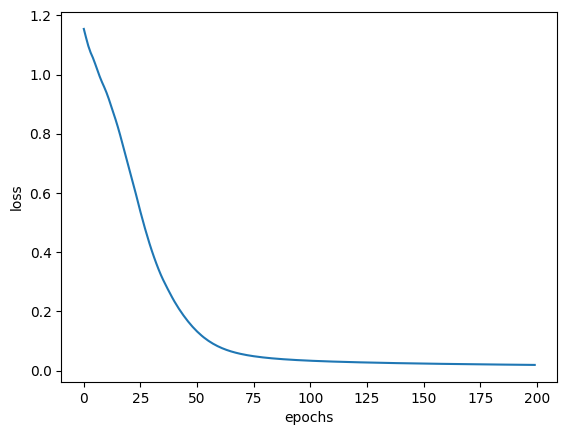

In [111]:
plt.plot(range(epochs), losses)
plt.xlabel("epochs")
plt.ylabel("loss")



In [112]:
with torch.no_grad():
    y_eval = model.forward(X_test)

    loss = criterion(y_eval, y_test)


In [113]:
loss

tensor(0.1561)

In [114]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}.) ({str(y_val)}) {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct = correct + 1

print('Correct', correct)

1.) (tensor([ 0.0000,  6.1342, 10.1455])) 2
2.) (tensor([ 0.0000,  2.9859, 15.6834])) 2
3.) (tensor([ 0.0000,  4.6679, 16.9110])) 2
4.) (tensor([ 0.5649, 11.3049,  3.4797])) 1
5.) (tensor([ 0.0000,  5.4529, 13.4333])) 2
6.) (tensor([ 2.4318, 11.7448,  1.4201])) 1
7.) (tensor([0.0000, 7.3535, 9.4482])) 2
8.) (tensor([ 0.7166, 11.4112,  3.1820])) 1
9.) (tensor([ 0.0000,  6.3746, 11.3769])) 2
10.) (tensor([ 0.0000,  3.0098, 16.7956])) 2
11.) (tensor([0.0000, 7.5388, 8.6919])) 2
12.) (tensor([17.2000,  8.8380,  0.0000])) 0
13.) (tensor([15.7244,  7.8127,  0.0000])) 0
14.) (tensor([3.6054, 9.7366, 0.0000])) 1
15.) (tensor([15.2222,  8.9336,  0.0000])) 0
16.) (tensor([0.0000, 8.5131, 7.7683])) 2
17.) (tensor([15.6847,  8.3980,  0.0000])) 0
18.) (tensor([0.0000, 6.5623, 9.6368])) 1
19.) (tensor([17.9512,  8.5064,  0.0000])) 0
20.) (tensor([14.0649,  8.0092,  0.0000])) 0
21.) (tensor([ 3.0712, 10.5946,  0.6115])) 1
22.) (tensor([ 0.0000,  4.2859, 15.3498])) 2
23.) (tensor([15.4193,  8.8150,  0